In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import time
from sklearn.linear_model import LinearRegression

In [77]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [2]:
def time_measure(f, x, repeats = 5):
    start = time.perf_counter()
    for i in range(repeats):
        f(x)
    return (time.perf_counter() - start) / repeats

In [3]:
def time_complexity(func, data, repit=5):
    time = []
    for x in data:
        time.append(time_measure(func, x, repit))
    return np.array(time)

In [4]:
def matrix_time_complexity(func, data, repit=5):
    time = []
    for i in range(1, len(data)+1):
        time.append(time_measure(func, data[:i, :i], repit))
    return np.array(time)


In [52]:
def get_fit(n, exper_time, fit_func, label_func = 'Teoretical fitting'):
    X = fit_func(n).reshape((len(n), 1))
    predict = LinearRegression().fit(X, exper_time).predict(X)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(n, exper_time * 1e6,  label='Experimental calculation')
    plt.plot(n, predict * 1e6,  linewidth=4, color = 'orange', label = label_func )
    plt.xlabel("Input size", **axis_font)
    plt.ylabel("Average execution time ($\mu s$)", **axis_font)
    plt.legend(loc="upper left")

    return predict

Lelt's define arrays of different sizes

In [6]:
n = np.array(range(1, 2001))
arrays = []
for i in n:
    sample = []
    for k in range(i):
        sample.append(random.uniform(0, 1000))
    arrays.append(sample)
arrays = np.array(arrays)

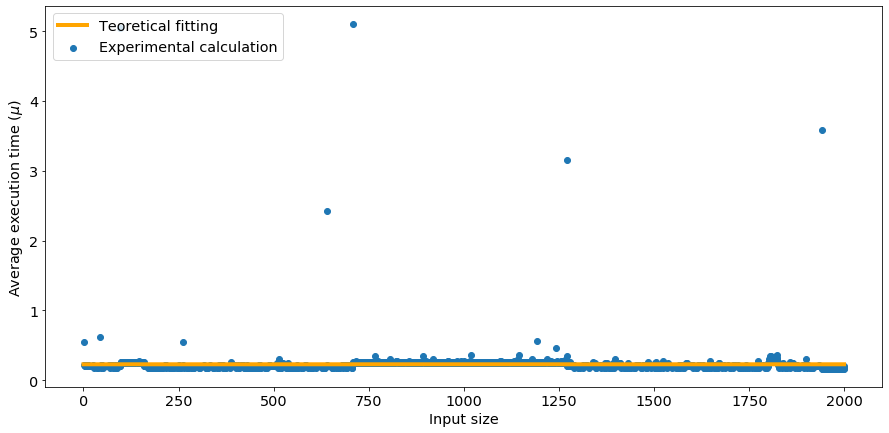

In [13]:
#1) constant function
def const_func(x):
    return 1

const_fun_time = time_complexity(const_func, arrays)
const_fun_pred = get_fit(n, const_fun_time, lambda x: x**0)

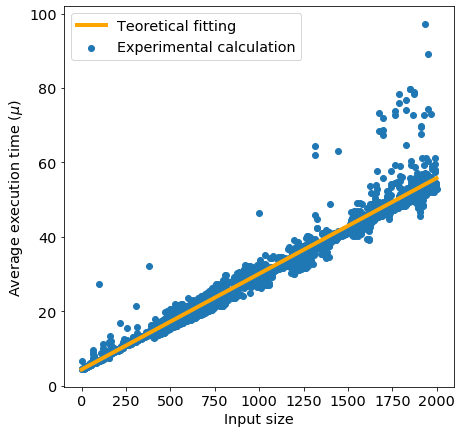

In [30]:
#2) sum of elements

sum_fun_time = time_complexity(np.sum, arrays, repit=15)
sun_fun_pred = get_fit(n, sum_fun_time, lambda x: x)

D:\Programs\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


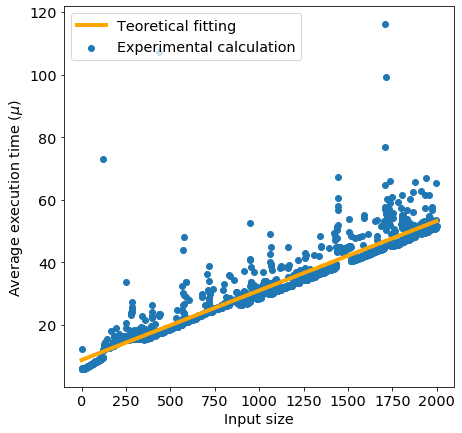

In [34]:
# 3)  product of array elements

prod_fun_time = time_complexity(np.prod, arrays)
prod_fun_pred = get_fit(n, prod_fun_time, lambda x: x)

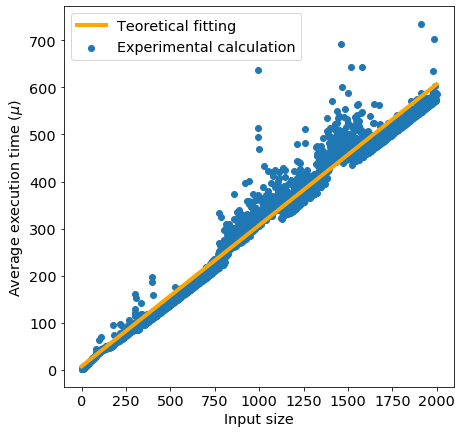

In [36]:
#4.1) usual polynomial
def usual_pol(data, x=1):
    result = 0
    for n, coef in enumerate(data):
        result += coef * x**n
    return result

usual_pol_time = time_complexity(usual_pol, arrays)
usual_pol_pred = get_fit(n, usual_pol_time, lambda x: x)



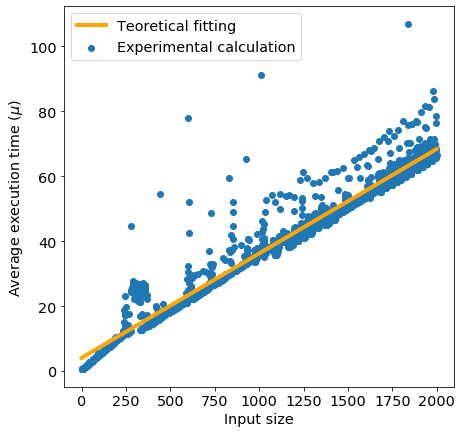

In [38]:
#4.2) Gorner polynomial

def gor_pol(data, x=1.5):
    result = data[0]
    for alpha in data[1:]:
        result = result*x + alpha
    return result

gor_pol_time = time_complexity(gor_pol, arrays)
gor_pol_pred = get_fit(n, gor_pol_time, lambda x: x)

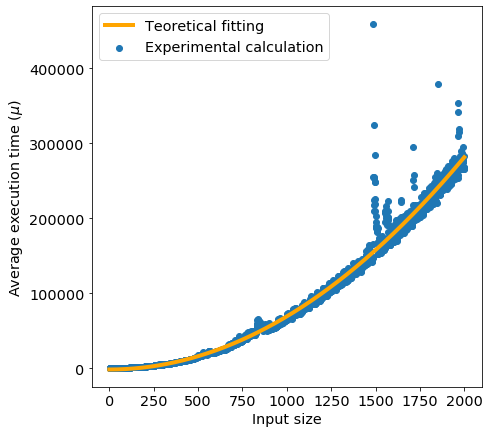

In [52]:
#5) Bubble sort

def bubbleSort(array):
    copy = array.copy()
    n = len(copy) 
    for i in range(n-1):  
        for j in range(0, n-i-1): 
            if copy[j] > copy[j+1]: 
                copy[j], copy[j+1] = copy[j+1], copy[j] 
    return copy

bubb_sort_time = time_complexity(bubbleSort, arrays)
bubb_sort_pred = get_fit(n, bubb_sort_time, lambda x: x**2)

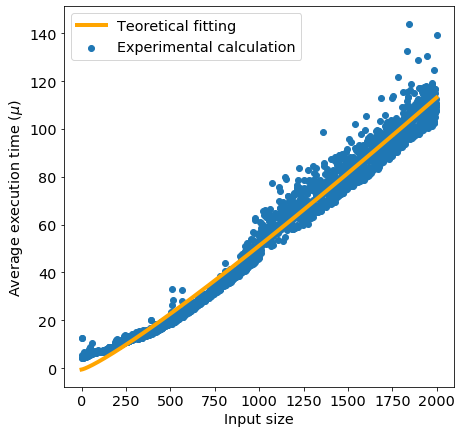

In [44]:
#6) Quick sort

def quick_sort(x):
    return np.sort(x, kind='quicksort')

quick_sort_time = time_complexity(quick_sort, arrays, repit=30)
quick_sort_pred = get_fit(n, quick_sort_time, lambda x: x*np.log(x))

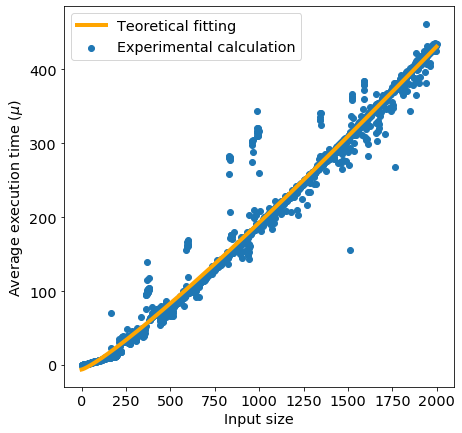

In [89]:
#7) Timsort

def timsort_f(x):
    return sorted(x)

timsort_time = time_complexity(timsort_f, arrays, repit=15)
timsort_pred = get_fit(n, timsort_time, lambda x: x* np.log(x))

In [46]:
matrix = np.random.rand(n[-1], n[-1])

In [ ]:
def matrix_dot(matrix):
    np.dot(matrix, matrix)

matrix_dot_time = matrix_time_complexity(matrix_dot, matrix, repit=5)
matrix_dot_pred = get_fit(n, matrix_dot_time, lambda x: x**3.0)

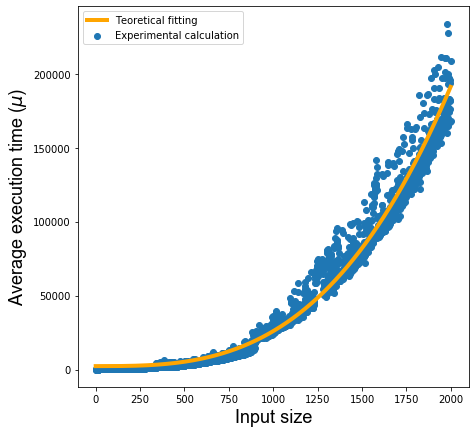

In [24]:
matrix_dot_pred = get_fit(n, matrix_dot_time, lambda x: x**(3.0))

In [111]:
ex_results = [const_fun_time, sum_fun_time, prod_fun_time, 
              usual_pol_time, gor_pol_time, bubb_sort_time, 
              quick_sort_time, timsort_time, matrix_dot_time]
fit_results = [const_fun_pred, sun_fun_pred, prod_fun_pred, 
               usual_pol_pred, gor_pol_pred, bubb_sort_pred, 
               quick_sort_pred, timsort_pred, matrix_dot_pred]

In [27]:
titles = ['Constant function', 'The sum of elements', 'The product of elements', 'Direct polynomial calculation',
          'Horner’s polynomial', 'Bubble Sort', 'Quick sort', 'Timsort', 'Matrix product']
approx = ['constant', 'c \cdot x', 'c \cdot x', 'c \cdot x','c \cdot x', 
          'c \cdot x^2', 'c \cdot n \log (n)','c \cdot n \log (n)','c \cdot n \log (n)', 'c \cdot x^3']

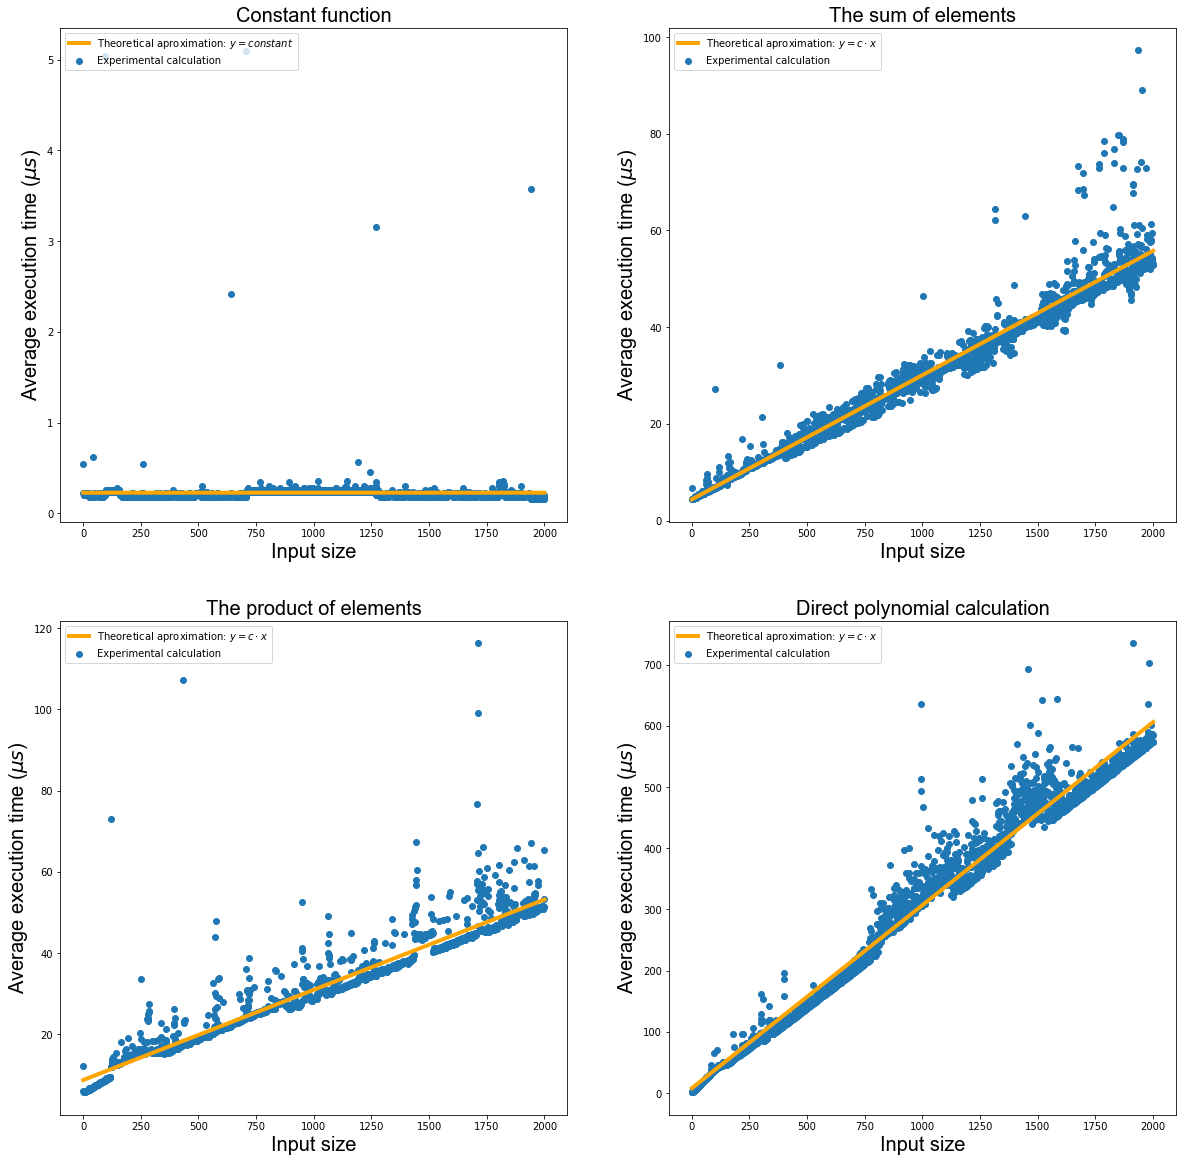

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'20'}


for i in range(4):
    axs[i//2, i%2].scatter(n, ex_results[i]* 1e6,  label='Experimental calculation')
    axs[i//2, i%2].plot(n, fit_results[i]* 1e6, label=f"Theoretical aproximation: $y={approx[i]}$", color="orange", linewidth=4)  
    axs[i//2, i%2].set_xlabel("Input size", **axis_font)
    axs[i//2, i%2].set_ylabel("Average execution time ($\mu s$)", **axis_font)
    axs[i//2, i%2].set_title(titles[i], **title_font)
    axs[i//2, i%2].legend(loc="upper left")

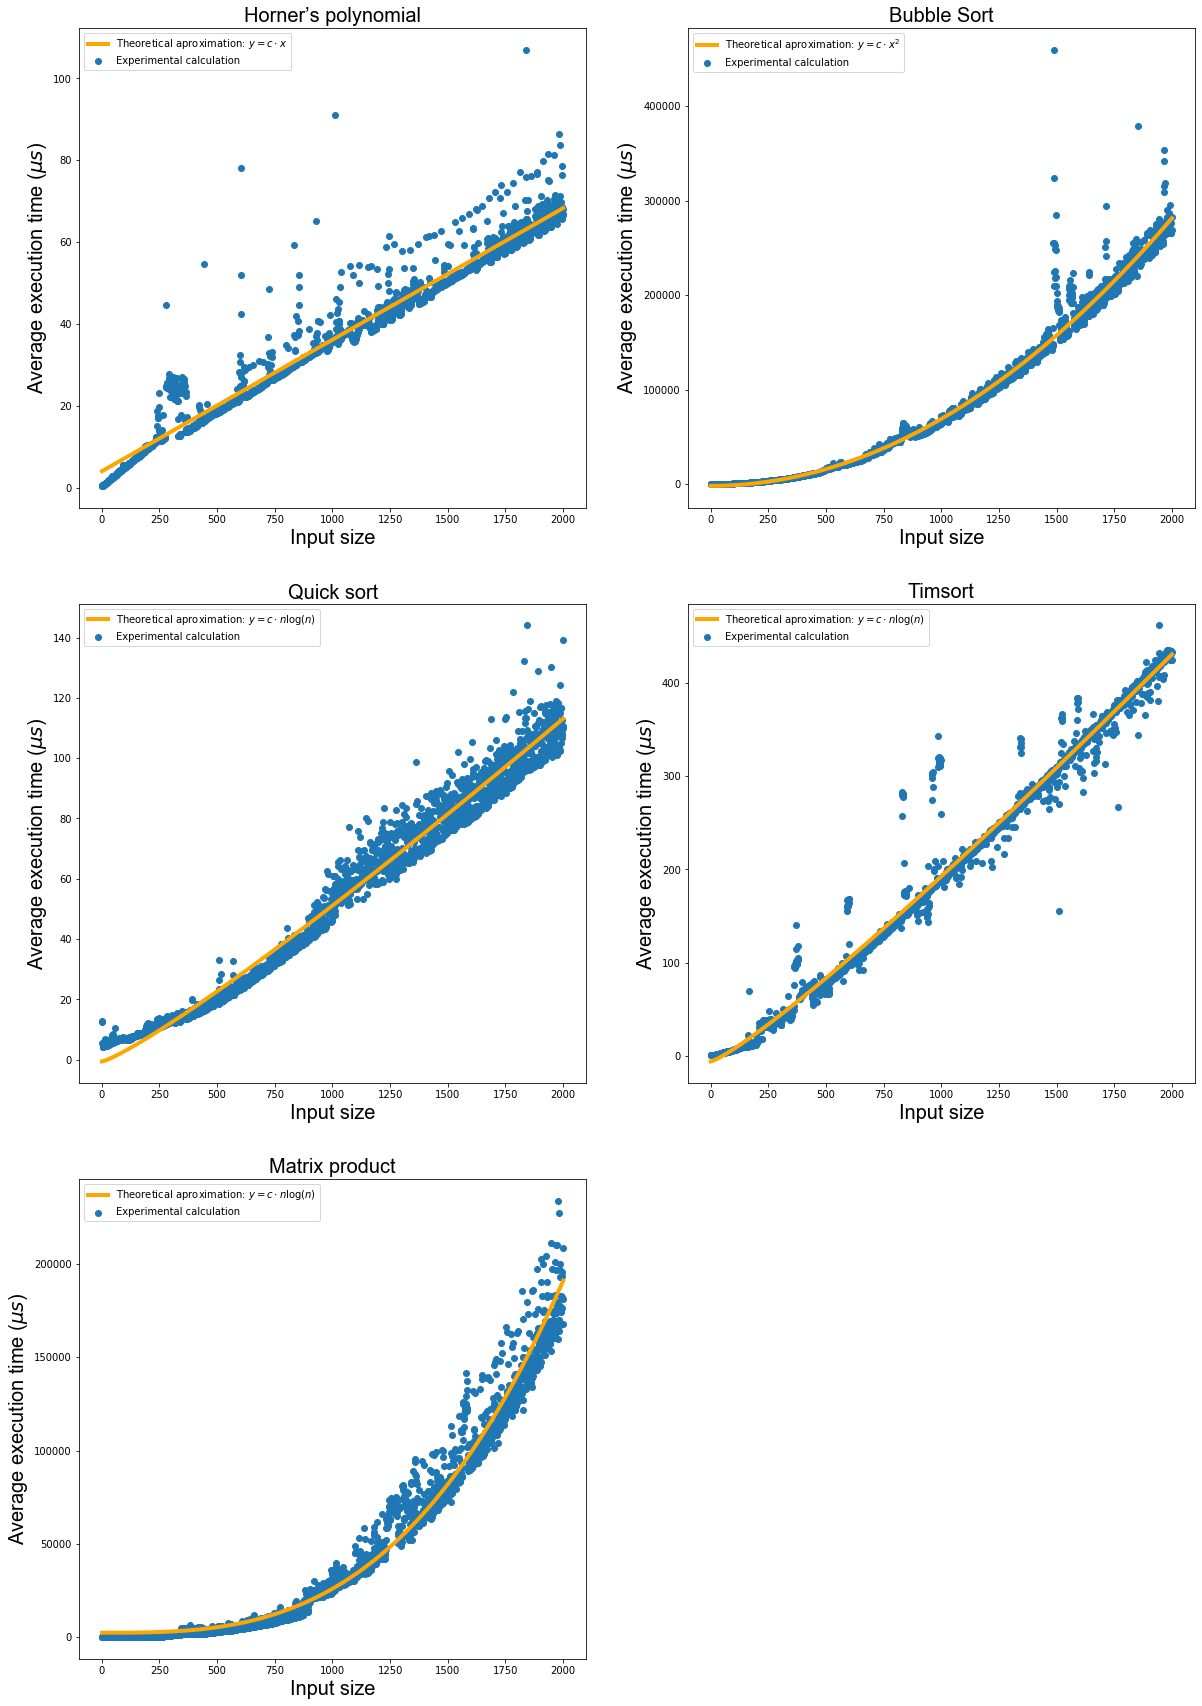

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(20, 30))

axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'20'}


for i in range(4, 9):
    axs[i//2-2, i%2].scatter(n, ex_results[i]* 1e6,  label='Experimental calculation')
    axs[i//2-2, i%2].plot(n, fit_results[i]* 1e6, label=f"Theoretical aproximation: $y={approx[i]}$", color="orange", linewidth=4)  
    axs[i//2-2, i%2].set_xlabel("Input size", **axis_font)
    axs[i//2-2, i%2].set_ylabel("Average execution time ($\mu s$)", **axis_font)
    axs[i//2-2, i%2].set_title(titles[i], **title_font)
    axs[i//2-2, i%2].legend(loc="upper left")
fig.delaxes(axs[-1][-1])

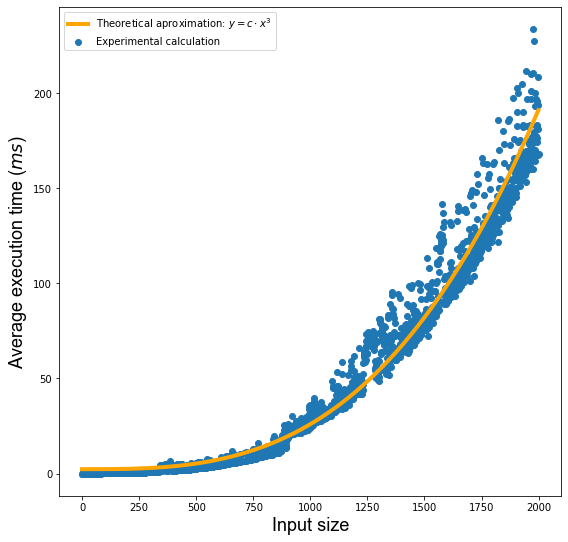

In [31]:
plt.figure(figsize=(9, 9))
plt.scatter(n, ex_results[-1] * 1e3,  label='Experimental calculation')
plt.plot(fit_results[-1] * 1e3,  linewidth=4, color = 'orange', label = f"Theoretical aproximation: $y={approx[-1]}$" )
plt.xlabel("Input size", **axis_font)
plt.ylabel("Average execution time ($ms$)", **axis_font)
plt.legend(loc="upper left")

In [7]:
import pickle

In [115]:
f = open('store.pckl', 'wb')
pickle.dump([ex_results, fit_results], f)
f.close()

In [8]:
f = open('store.pckl', 'rb')
obj = pickle.load(f)
f.close()